<a href="https://colab.research.google.com/github/Arnav1511/OMSA/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing drive library and mounting gdrive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Mounting the dataset

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [4]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


Listing all the contents

In [ ]:
!ls


'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


In [ ]:
!pwd


/content/gdrive/MyDrive/kaggle_dataset


Downloading dataset from Kaggle

In [ ]:
!kaggle datasets download -d wjia26/big-tech-companies-tweet-sentiment

big-tech-companies-tweet-sentiment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


Unzipping the dataset

In [ ]:
!unzip /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip

Archive:  /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip
  inflating: Bigtech - 12-07-2020 till 19-09-2020/Bigtech - 12-07-2020 till 19-09-2020.csv  
  inflating: Bigtech - 20-09-2020 till 13-10-2020.csv  


In [ ]:
!ls


'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


Creating dataframe from the dataset

In [5]:
import pandas as pd
df=pd.read_csv("Bigtech - 20-09-2020 till 13-10-2020.csv")


In [6]:
df.shape

(266095, 15)

In [7]:
df.columns

Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'],
      dtype='object')

Extract the reviews

In [8]:
tweet=df.text.values
print(tweet)

['#NVIDIA #GauGAN is actually a good tool to practice composition/framing? https://t.co/CJyec1kNU1'
 '#BullSequana X2415, the first #supercomputer blade server in Europe to integrate #NVIDIA’s Ampere next-generation graphics processing unit architecture, the NVIDIA A100 Tensor Core #GPU s.  Read more ▶ https://t.co/5HXnY4IoJ5 Atos is sponsor at #Nvidia #GTC20 Digital https://t.co/KSd2CmfsUH'
 "I'm going to attend GTC 2020 tonight! Excited. #Nvidia #GTC20" ...
 'NEW VIDEO!!   FRIEND v FRIEND CHALLENGE!!   https://t.co/dOrH0MRRNi   #friendvfriend #friends #challenge #challenger #youtube #YouTuber #twitch #TwitchStreamers'
 '‼️NEW VIDEO‼️ Films inspired by Jodorowskys Dune  REACTION 💥  YouTube: Those 2! REACTION  * HERE’S OUR VIDEO: https://t.co/f0wKQQ2Wpe * #youtube #those2 #those2reacts #reaction #subscribe #supportblackcreators #contentcreators #share #couple #dune #filmsinspiredbydune https://t.co/ismHqfBjtr'
 '‼️NEW VIDEO‼️ Films inspired by Jodorowskys Dune  REACTION 💥  YouTube: Tho

Tokenizing and removing stopwords

In [9]:
import nltk 
from nltk.tokenize import RegexpTokenizer #to remove punctuations and tokenize the text
from nltk.corpus import stopwords # to remove the stop words after tokenization
nltk.download('stopwords')
nltk.download('punkt')

#tokens_without_sw = [word for word in tweet if not word in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Cleaning the Text (emojis, mentions, hashtags, hyperlinks)

In [10]:
import re

emojis = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
  text = re.sub(r'#','',text) #Removing the #symbol
  text = re.sub(r'RT[\s]+','',text)  #Removing the RT
  text = re.sub(r'https?:\/\/\S+','',text) #Removing the hyperlinks
  text = emojis.sub(r'',text) #remove emojis

  return text


#Cleaning the text
df['text']=df['text'].apply(cleanTxt)

#Show the cleaned text
df.tail(12)


,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
266083,2020-10-03 23:56:34,Youtube,4336,66,Youtube,🌎 Worldwide,0,musicnews360,#Youtube,$AAPL $TSLA $MSFT $SPY $AMZN $FB $GOOG music ...,1312542087892664320,Music News 360,0.6792,Technology,Youtube
266084,2020-10-03 23:55:51,Youtube,103,21,Youtube,NaN,0,DeasyLoverss,#Youtube,youtube channel : Deasy Natalina Video Officia...,1312541906568507392,Deasy natalina FC,0.0000,Technology,Youtube
266085,2020-10-03 23:55:39,Youtube,1820,942,Youtube,"Florida, USA",1,jakejameslugo,#Youtube,So I got my next video for the channel DONE to...,1312541857562402816,Jakejames Lugo,0.9200,Technology,Youtube
266086,2020-10-03 23:55:24,Youtube,561,881,Youtube,NaN,0,crystalmonay21,#Youtube,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,1312541794404573186,Those 2! REACTS On YT 💕😁,0.5411,Technology,Youtube
266087,2020-10-03 23:55:20,Youtube,89564,63907,Youtube,England,1,Susanjmccann,#Youtube,"This prayer is for you if you're unwell, or if...",1312541779347079169,Susan McCann,0.3612,Technology,Youtube
266088,2020-10-03 23:55:16,Youtube,42410,33958,Youtube,England.,1,themerry_monk,#Youtube,"You already know that you help many people, da...",1312541762662084608,Gerry McCann,0.9062,Technology,Youtube
266089,2020-10-03 23:55:04,Youtube,561,881,Youtube,NaN,0,crystalmonay21,#Youtube,‼️NEW VIDEO‼️ Films inspired by Jodorowskys Du...,1312541709650350080,Those 2! REACTS On YT 💕😁,0.5411,Technology,Youtube
266090,2020-10-03 23:54:59,Youtube,176,9,Youtube,NaN,0,asian_view,#Youtube,New vlog arrivals! Discover a lovely culture t...,1312541692046667777,Asian View,0.9167,Technology,Youtube
266091,2020-10-03 23:54:54,Youtube,308,567,Youtube,London UK,1,Kaiu24,#Youtube,New Video is up. Finally showing my new Stream...,1312541667703033858,Kaiu24,0.3182,Technology,Youtube
266092,2020-10-03 23:54:53,Youtube,27,101,Youtube,"England, United Kingdom",0,RyanDeebo,#Youtube,NEW VIDEO!! FRIEND v FRIEND CHALLENGE!! ...,1312541664494444544,RyanDeebo,0.9015,Technology,Youtube


In [ ]:
df=df.drop_duplicates(subset='text')

In [13]:
df.tail(20)

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
266075,2020-10-03 23:58:05,Youtube,10,30,Youtube,Youtube,0,YoungWheezy17,#Youtube,any minecraft youtubers wanna collab? pm me if...,1312542469842706432,Young Wheezy,0.4574,Technology,Youtube
266076,2020-10-03 23:58:01,Youtube,10,80,Youtube,NaN,0,saenz_colton,#Youtube,Among_us Livestream in 2 hours at 9pm central ...,1312542455623892992,Colton Saenz,0.0000,Technology,Youtube
266077,2020-10-03 23:57:52,Youtube,13,6,Youtube,Xantontown,1,18Redemption,#Youtube,• Follow me • ...,1312542415417487361,VIRAL 🌎🌍🌏,0.0000,Technology,Youtube
266078,2020-10-03 23:57:39,Youtube,578,833,Youtube,NaN,1,TheGamerzHaven,#Youtube,TheGamerzHaven is hosting Pathfinder with _Pho...,1312542362476961794,Kumo,0.0000,Technology,Youtube
266079,2020-10-03 23:57:02,Youtube,4,18,Youtube,"Kentucky, USA",0,TheUnD3adArmy,#Youtube,Call of Duty Warzone Best Montage! CallOfDuty ...,1312542206092292096,TheUnD3adArmy/#FazeUnDead,0.6696,Technology,Youtube
266080,2020-10-03 23:56:54,Youtube,441,3375,Youtube,United States,0,_communityshop_,#Youtube,SouthCarolina Support the stream: Thank You...,1312542174043570177,https://works-micro-office.freeforums.net,0.6696,Technology,Youtube
266081,2020-10-03 23:56:38,Youtube,80,145,Youtube,Australia,0,WolfWill_77_YT,#Youtube,It's time to hunt for more masks in CrashBandi...,1312542105156288512,WOLFWILL,0.3802,Technology,Youtube
266082,2020-10-03 23:56:35,Youtube,1775,1960,Youtube,"Dallas, TX",0,PamelaCFoland,#Youtube,Saturday night movie time! I love this movie!...,1312542093458526210,Pamela Foland,0.7249,Technology,Youtube
266083,2020-10-03 23:56:34,Youtube,4336,66,Youtube,🌎 Worldwide,0,musicnews360,#Youtube,$AAPL $TSLA $MSFT $SPY $AMZN $FB $GOOG music ...,1312542087892664320,Music News 360,0.6792,Technology,Youtube
266084,2020-10-03 23:55:51,Youtube,103,21,Youtube,NaN,0,DeasyLoverss,#Youtube,youtube channel : Deasy Natalina Video Officia...,1312541906568507392,Deasy natalina FC,0.0000,Technology,Youtube


Vectorizing the reviews

In [14]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#def getFilteredText(text):
#    text= cleanText(text);
#    return text

df['Subjectivity']=df['text'].apply(getSubjectivity)
df['NewPolarity']=df['text'].apply(getPolarity)
#df['CleanedText']=df['text'].apply(getFilteredText)

Generating the wordcloud after text filtering

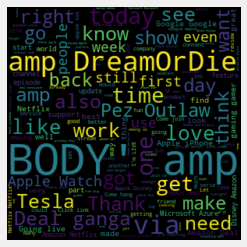

In [15]:
#Plot a word cloud 
from wordcloud import WordCloud
import tweepy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

restricted=['YOUTUBE','SUBSCRIBE','CHECK','twitch','New', 'video','Follow','Comment']+stopwords.words('english')

allWords = ' '.join( [twts for twts in df['text']])
wordCloud = WordCloud( width = 300, height= 300, random_state = 21, max_font_size = 119, stopwords=restricted).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

Generating the analysis (Negative, Positive, Neutral)

In [16]:
#Create a function to compute positive, negative or neutral text

def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis']= df['NewPolarity'].apply(getAnalysis)


In [68]:
df[['file_name', 'text', 'Subjectivity', 'NewPolarity','Analysis']].head(50)


,file_name,text,Subjectivity,NewPolarity,Analysis
0,Nvidia,NVIDIA GauGAN is actually a good tool to pract...,0.600000,0.700000,Positive
1,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
2,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,0.750000,0.375000,Positive
3,Nvidia,NVIDIA delays launch of GeForce RTX 3070 until...,0.000000,0.000000,Neutral
4,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
5,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
6,Nvidia,"Today, don’t miss the World’s largest AI confe...",0.000000,0.000000,Neutral
7,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
8,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
9,Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,0.633333,0.033333,Positive


Plotting the Subjectivity vs Polarity graph for first 1500 reviews

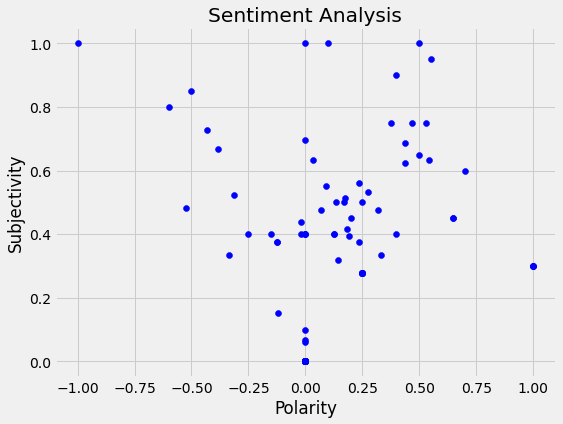

In [18]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, 100):
  plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

In [19]:
df.shape[0]

266095

Plotting the Subjectivity vs Polarity graph for Nvidia throughout the dataframe

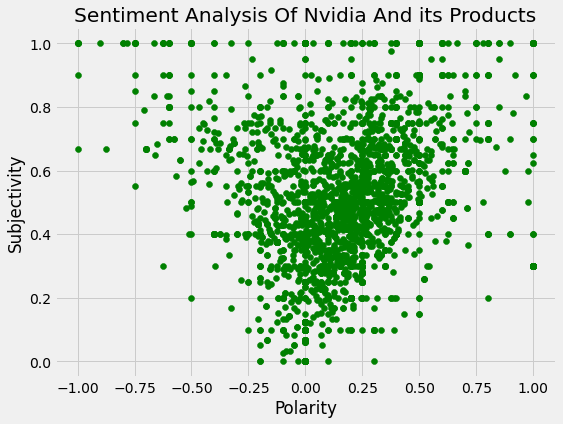

In [20]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if (df['file_name'][i]=='Nvidia'):
        plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Green')

  plt.title('Sentiment Analysis Of Nvidia And its Products')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

Plotting the Subjectivity vs Polarity graph for Twitch throughout the dataframe

In [21]:
#Get the percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round(  (ptweets.shape[0] / df.shape[0]) *100, 1)

51.5

In [22]:
nvidia = ptweets[df.file_name=='Nvidia']
ms = ptweets[df.file_name=='Microsoft']
amd = ptweets[df.file_name=='AMD']
amazon = ptweets[df.file_name=='Amazon']
twitch = ptweets[df.file_name=='Twitch']
apple = ptweets[df.file_name=='Apple']
youtube = ptweets[df.file_name=='Youtube']
tesla = ptweets[df.file_name=='Tesla']
google = ptweets[df.file_name=='Google']
netflix = ptweets[df.file_name=='Netflix']



print("Positive reviews regarding Nvidia and its products: "+str(round(  (nvidia.shape[0] / ptweets.shape[0]) *100,1))+"%")
print("Positive reviews regarding Microsoft and its products: "+str(round(  (ms.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding AMD and its products: "+str(round(  (amd.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Amazon and its products: "+str(round(  (amazon.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Twitch and its products: "+str(round(  (twitch.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Apple and its products: "+str(round(  (apple.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Youtube and its products: "+str(round(  (youtube.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Tesla and its products: "+str(round(  (tesla.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Google and its products: "+str(round(  (google.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Netflix and its products: "+str(round(  (netflix.shape[0] / ptweets.shape[0]) *100, 1))+"%")


Positive reviews regarding Nvidia and its products: 1.4%
Positive reviews regarding Microsoft and its products: 9.3%
Positive reviews regarding AMD and its products: 1.3%
Positive reviews regarding Amazon and its products: 10.1%
Positive reviews regarding Twitch and its products: 17.4%
Positive reviews regarding Apple and its products: 14.4%
Positive reviews regarding Youtube and its products: 14.0%
Positive reviews regarding Tesla and its products: 6.4%
Positive reviews regarding Google and its products: 11.7%
Positive reviews regarding Netflix and its products: 13.9%


In [23]:
#Get the percentage of Negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets = ntweets['text']
round(  (ntweets.shape[0] / df.shape[0]) *100, 1)

12.5

In [24]:
nvidiant = ntweets[df.file_name=='Nvidia']
msnt = ntweets[df.file_name=='Microsoft']
amdnt = ntweets[df.file_name=='AMD']
amazonnt = ntweets[df.file_name=='Amazon']
twitchnt = ntweets[df.file_name=='Twitch']
applent = ntweets[df.file_name=='Apple']
youtubent = ntweets[df.file_name=='Youtube']
teslant = ntweets[df.file_name=='Tesla']
googlent = ntweets[df.file_name=='Google']
netflixnt = ntweets[df.file_name=='Netflix']

print("Negative reviews regarding Nvidia and its products: "+str(round(  (nvidiant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Microsoft and its products: "+str(round(  (msnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding AMD and its products: "+str(round(  (amdnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Amazon and its products: "+str(round(  (amazonnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Twitch and its products: "+str(round(  (twitchnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Apple and its products: "+str(round(  (applent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Youtube and its products: "+str(round(  (youtubent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Tesla and its products: "+str(round(  (teslant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Google and its products: "+str(round(  (googlent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Netflix and its products: "+str(round(  (netflixnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")


Negative reviews regarding Nvidia and its products: 1.8%
Negative reviews regarding Microsoft and its products: 9.5%
Negative reviews regarding AMD and its products: 1.0%
Negative reviews regarding Amazon and its products: 7.5%
Negative reviews regarding Twitch and its products: 17.2%
Negative reviews regarding Apple and its products: 14.7%
Negative reviews regarding Youtube and its products: 13.1%
Negative reviews regarding Tesla and its products: 7.6%
Negative reviews regarding Google and its products: 10.7%
Negative reviews regarding Netflix and its products: 16.9%


In [25]:
#Get the percentage of Neutral tweets
netweets=df[df.Analysis == 'Neutral']
netweets = netweets['text']
round(  (netweets.shape[0] / df.shape[0]) *100, 1)

36.0

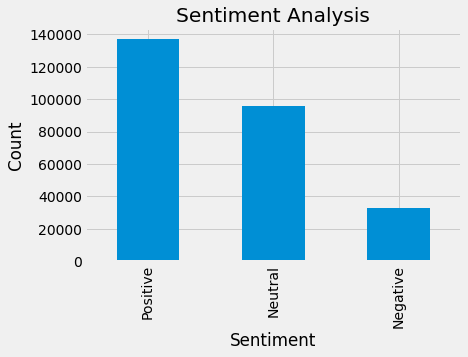

In [26]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
#amd.value_counts().plot(kind='bar')


plt.show()


In [27]:
#positive reviews variables
p_nvidia=round((nvidia.shape[0] / ptweets.shape[0])*100,1)
p_ms=round((ms.shape[0] / ptweets.shape[0])*100,1)
p_amd=round((amd.shape[0] / ptweets.shape[0])*100,1)
p_amz=round((amazon.shape[0] / ptweets.shape[0])*100,1)
p_twitch=round((twitch.shape[0] / ptweets.shape[0])*100,1)
p_apple=round((apple.shape[0] / ptweets.shape[0])*100,1)
p_ytube=round((youtube.shape[0] / ptweets.shape[0])*100,1)
p_tesla=round((tesla.shape[0] / ptweets.shape[0])*100,1)
p_google=round((netflix.shape[0] / ptweets.shape[0])*100,1)
p_netflix=round((netflix.shape[0] / ptweets.shape[0])*100,1)

#negative reviews variables
n_nvidia=round((nvidiant.shape[0] / ntweets.shape[0])*100,1)
n_ms=round((msnt.shape[0] / ntweets.shape[0])*100,1)
n_amd=round((amdnt.shape[0] / ntweets.shape[0])*100,1)
n_amz=round((amazonnt.shape[0] / ntweets.shape[0])*100,1)
n_twitch=round((twitchnt.shape[0] / ntweets.shape[0])*100,1)
n_apple=round((applent.shape[0] / ntweets.shape[0])*100,1)
n_ytube=round((youtubent.shape[0] / ntweets.shape[0])*100,1)
n_tesla=round((teslant.shape[0] / ntweets.shape[0])*100,1)
n_google=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)
n_netflix=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)

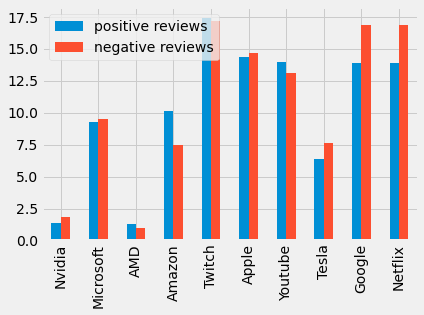

In [28]:
plotdata = pd.DataFrame({
    "positive reviews":[p_nvidia,p_ms,p_amd,p_amz,p_twitch,p_apple,p_ytube,p_tesla,p_google,p_netflix],
    "negative reviews":[n_nvidia,n_ms,n_amd,n_amz,n_twitch,n_apple,n_ytube,n_tesla,n_google,n_netflix]
    }, 
    index=["Nvidia","Microsoft","AMD","Amazon","Twitch","Apple", "Youtube","Tesla","Google","Netflix"]
)

plotdata.plot(kind="bar")

In [29]:
import sklearn
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.svm import SVR

x = df['text'].head(500)
y = df['NewPolarity'].head(500)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

# array1=np.array(x)
# array2=np.array(y)

# array1=array1.reshape(-1,1)
# array2=array2.reshape(-1,1)

# y=y.astype('float')
# print(array1)
# print(array2)

In [94]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

#Vectorize text reviews to numbers

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
y=y.astype('int')
x=x.astype('int')


In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression

model = MultinomialNB()
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
from sklearn.linear_model import LinearRegression

lireg=LinearRegression() # initialize the model
lireg.fit(x,y) # fit he model
y_pred=lireg.predict(x_test) # now predict

# Taking out the accuracy 

model.score(x,y)

0.994

In [102]:
#Code completed with 99% accuracy, thankyou for watching...